#### Objective: To predict the SalePrice of houses using the dataset provided in Kag competition 

## 1) import needed packages

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from scipy import stats

## 2) import train dataset

In [4]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

#### training dataset

In [5]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### testing dataset

In [6]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


 #### the correlation between numerical features and the target "SalePrice"

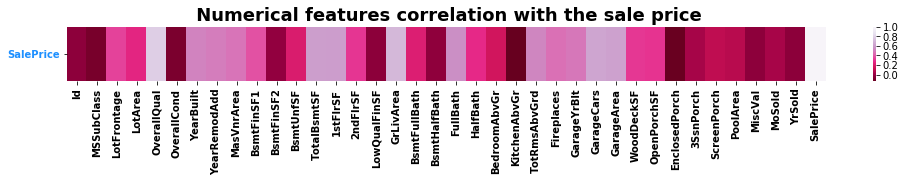

In [10]:
num=df_train.select_dtypes(exclude='object')
numcorr=num.corr()
f,ax=plt.subplots(figsize=(17,1))
sns.heatmap(numcorr.sort_values(by=['SalePrice'], ascending=False).head(1), cmap='PuRd_r')
plt.title(" Numerical features correlation with the sale price", weight='bold', fontsize=18)
plt.xticks(weight='bold')
plt.yticks(weight='bold', color='dodgerblue', rotation=0)

plt.show()

we can see the higher correlation between sale price and "*OverallQual ,GrLivArea..*" , which is logical , better quality and bigger area = Higher price.

## 3) handle missing data

In [24]:
# function that print the percentage of missing data in features of dataframe
def missingDataPercentage(dataframe):
    total = dataframe.isnull().sum().sort_values(ascending=False)
    print("missing data percentage")
    totalp = (total/dataframe.shape[0])*100
    print(pd.DataFrame(totalp[totalp >0]))


In [25]:
# missing data in training set and testing set
print("training set")
missingDataPercentage(df_train)
print("\n \n"+'-'*25)
print("testing set")
missingDataPercentage(df_test)

training set
missing data percentage
                      0
PoolQC        99.520548
MiscFeature   96.301370
Alley         93.767123
Fence         80.753425
FireplaceQu   47.260274
LotFrontage   17.739726
GarageCond     5.547945
GarageType     5.547945
GarageYrBlt    5.547945
GarageFinish   5.547945
GarageQual     5.547945
BsmtExposure   2.602740
BsmtFinType2   2.602740
BsmtFinType1   2.534247
BsmtCond       2.534247
BsmtQual       2.534247
MasVnrArea     0.547945
MasVnrType     0.547945
Electrical     0.068493

 
-------------------------
testing set
missing data percentage
                      0
PoolQC        99.794380
MiscFeature   96.504455
Alley         92.666210
Fence         80.123372
FireplaceQu   50.034270
LotFrontage   15.558602
GarageCond     5.346127
GarageQual     5.346127
GarageYrBlt    5.346127
GarageFinish   5.346127
GarageType     5.209047
BsmtCond       3.084304
BsmtQual       3.015764
BsmtExposure   3.015764
BsmtFinType1   2.878684
BsmtFinType2   2.878684
MasVnrType

#### Percent missing data by feature

Text(0.5, 1.0, 'Percent missing data by feature')

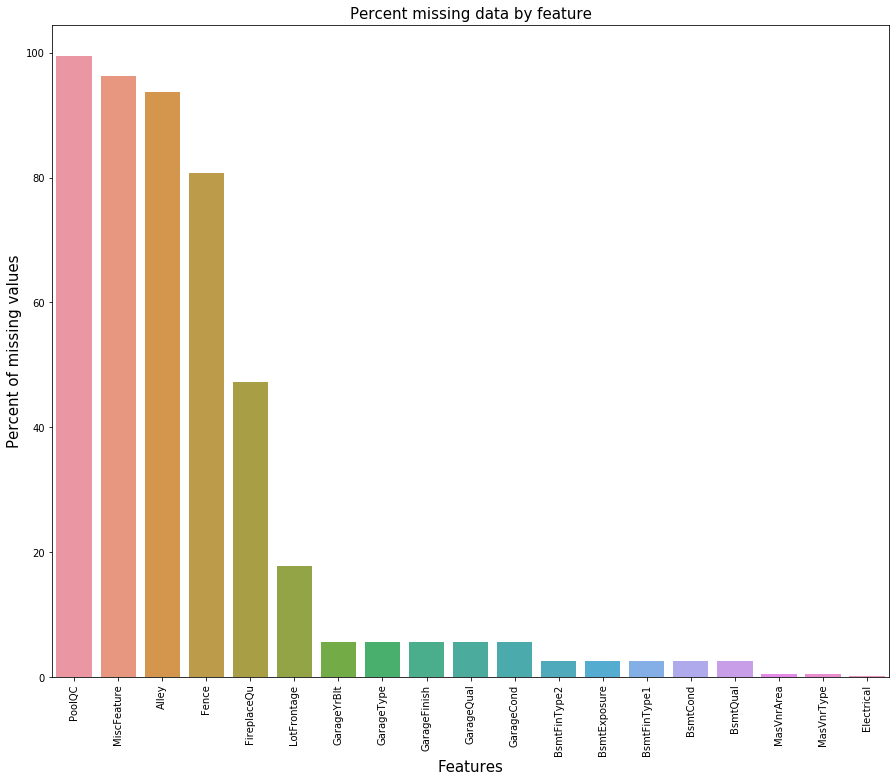

In [27]:
all_data_na = (df_train.isnull().sum() / len(df_train)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation="90")
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel("Features", fontsize=15)
plt.ylabel("Percent of missing values", fontsize=15)
plt.title("Percent missing data by feature", fontsize=15)

### Imputing missing value and Feature engineering

In [28]:
# Nan poolQC value mean that there is no pool so we replace it with None
df = df_train.copy()
ds = df_test.copy()
df['PoolQC'] = df['PoolQC'].fillna('None')
ds['PoolQC'] = ds['PoolQC'].fillna('None')

In [29]:
# Nan MiscFeature value mean that there is no Miscellaneous feature not covered in other categories so we replace it with None
df['MiscFeature'] = df['MiscFeature'].fillna('None')
ds['MiscFeature'] = ds['MiscFeature'].fillna('None')


In [30]:
# Nan Alley value mean that there is No alley access so we replace it with None
df['Alley'] = df['Alley'].fillna('None')
ds['Alley'] = ds['Alley'].fillna('None')


In [31]:
# Nan Fence value mean that there is No Fence so we replace it with None
df['Fence'] = df['Fence'].fillna('None')
ds['Fence'] = ds['Fence'].fillna('None')


In [32]:
# Nan FireplaceQu value mean that there is No Fireplace so we replace it with None
df['FireplaceQu'] = df['FireplaceQu'].fillna('None')
ds['FireplaceQu'] = ds['FireplaceQu'].fillna('None')


In [33]:
# LotFrontage : Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood 
# so we can replace nan value in LotFrontage with the mean
df['LotFrontage'] = df['LotFrontage'].fillna(df_train['LotFrontage'].mean())
ds['LotFrontage'] = ds['LotFrontage'].fillna(df_train['LotFrontage'].mean())


In [34]:
# for GarageArea , GarageCars , GarageYrBlt :nan value mean that there is no Garage so i will replace it with 0

for i in ['GarageArea' , 'GarageCars' , 'GarageYrBlt']:
    df[i] = df[i].fillna(0)
    ds[i] = ds[i].fillna(0)



In [36]:
# for GarageType , GarageCond , GarageFinish , GarageQual: nan value mean that there is no garage so we replace it with None
for col in ['GarageType' , 'GarageCond' , 'GarageFinish' , 'GarageQual']:
    df[col] = df[col].fillna("None")
    ds[col] = ds[col].fillna("None")


In [37]:
# for BsmtFinType2 , BsmtExposure , BsmtQual , BsmtFinType1 ,BsmtCond : nan value mean that there is no basement so we replace it with None
for col in ['BsmtFinType2' , 'BsmtExposure' , 'BsmtQual' , 'BsmtFinType1' ,'BsmtCond']:
    df[col] = df[col].fillna("None")
    ds[col] = ds[col].fillna("None")


In [38]:
for col in ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']:
    df[col] = df[col].fillna(0)
    ds[col] = ds[col].fillna(0)    


In [39]:
# MasVnrArea , MasVnrType : NAn most likely means no masonry veneer for these houses. We can replace it with 0 for the area and None for the type.
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)
df['MasVnrType'] = df['MasVnrType'].fillna('None')
ds['MasVnrArea'] = ds['MasVnrArea'].fillna(0)
ds['MasVnrType'] = ds['MasVnrType'].fillna('None')


In [40]:
# Electrical : It has one NAn value. Since this feature has mostly 'SBrkr', we can set that for the missing value.
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])
ds['Electrical'] = ds['Electrical'].fillna(df['Electrical'].mode()[0])



In [41]:
#MSZoning (The general zoning classification) : 'RL' is by far the most common value. So we can fill in missing values with 'RL'
df['MSZoning'] = df['MSZoning'].fillna(df['MSZoning'].mode()[0])
ds['MSZoning'] = ds['MSZoning'].fillna(df['MSZoning'].mode()[0])



In [43]:
# Utilities : For this categorical feature all records are "AllPub", except for one "NoSeWa" and 2 NA . Since the house with 'NoSewa' is in the training set, this feature won't help in predictive modelling. We can then safely remove it.
df = df.drop(['Utilities'], axis=1)
ds = ds.drop(['Utilities'], axis=1)


KeyError: "['Utilities'] not found in axis"

In [44]:
# Functional : data description says NAn means typical
df["Functional"] = df["Functional"].fillna("Typ")
ds["Functional"] = ds["Functional"].fillna("Typ")


In [45]:
# SaleType
df["SaleType"] = df["SaleType"].fillna("Oth")
ds["SaleType"] = ds["SaleType"].fillna("Oth")


In [46]:
# Exterior1st , Exterior2nd

df['Exterior1st'] = df['Exterior1st'].fillna('Other')
df['Exterior2nd'] = df['Exterior2nd'].fillna('Other')

ds['Exterior1st'] = ds['Exterior1st'].fillna('Other')
ds['Exterior2nd'] = ds['Exterior2nd'].fillna('Other')


In [47]:
# KitchenQual

df['KitchenQual'] = df['KitchenQual'].fillna(df['KitchenQual'].mode()[0])
ds['KitchenQual'] = ds['KitchenQual'].fillna(ds['KitchenQual'].mode()[0])


In [48]:
# we can see now that there is no missing data
print("training set")
missingDataPercentage(df)
print("\n \n"+'-'*50)
print("testing set")
missingDataPercentage(ds)

training set
missing data percentage
Empty DataFrame
Columns: [0]
Index: []

 
--------------------------------------------------
testing set
missing data percentage
Empty DataFrame
Columns: [0]
Index: []


In [49]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000000,8450,Pave,None,Reg,Lvl,Inside,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000000,9600,Pave,None,Reg,Lvl,FR2,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000000,11250,Pave,None,IR1,Lvl,Inside,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000000,9550,Pave,None,IR1,Lvl,Corner,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000000,14260,Pave,None,IR1,Lvl,FR2,...,0,None,None,None,0,12,2008,WD,Normal,250000
5,6,50,RL,85.000000,14115,Pave,None,IR1,Lvl,Inside,...,0,None,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.000000,10084,Pave,None,Reg,Lvl,Inside,...,0,None,None,None,0,8,2007,WD,Normal,307000
7,8,60,RL,70.049958,10382,Pave,None,IR1,Lvl,Corner,...,0,None,None,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.000000,6120,Pave,None,Reg,Lvl,Inside,...,0,None,None,None,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.000000,7420,Pave,None,Reg,Lvl,Corner,...,0,None,None,None,0,1,2008,WD,Normal,118000


### Transforming some categorical variables to numerical

In [56]:
# MSSubClass colum seems like categorical variable (values : {20, 30, 40, 45, 50, 60, 70, 75, 80, 85, 90, 120, 160, 180, 190})
# set(df_train['MSSubClass'].values)
df['MSSubClass'] = df['MSSubClass'].apply(str)
ds['MSSubClass'] = ds['MSSubClass'].apply(str)


In [50]:
print("train data :",df.shape)
print("test data :",ds.shape)

train data : (1460, 80)
test data : (1459, 79)


In [66]:
#cocnatenate the train and test set 
df_all = pd.concat([df,ds])

C:\Users\BANA\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [67]:
# list of categrical features 
cols = set(df_all.columns)
numcols = set(df_all._get_numeric_data().columns)
catcols = list(cols - numcols)


In [70]:
# categorical columns that have a order 
ord_fields=['MSSubClass','ExterQual','LotShape','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1', 'BsmtFinType2','HeatingQC'
            ,'Functional','FireplaceQu','KitchenQual', 'GarageFinish','GarageQual','GarageCond','PoolQC','Fence']

orders=[ 
        #msclass 
        ['20','30','40','45','50','60','70','75','80','85', '90','120','150','160','180','190'], 
        #ExterQual 
        ['Fa','TA','Gd','Ex'], 
        #LotShape 
        ['Reg','IR1' ,'IR2','IR3'], 
        #BsmtQual 
        ['None','Fa','TA','Gd','Ex'], 
        #BsmtCond 
        ['None','Po','Fa','TA','Gd','Ex'], 
        #BsmtExposure 
        ['None','No','Mn','Av','Gd'], 
        #BsmtFinType1 
        ['None','Unf','LwQ', 'Rec','BLQ','ALQ' , 'GLQ' ], 
        #BsmtFinType2 
        ['None','Unf','LwQ', 'Rec','BLQ','ALQ' , 'GLQ' ], 
        #HeatingQC 
        ['Po','Fa','TA','Gd','Ex'], 
        #Functional 
        ['Sev','Maj2','Maj1','Mod','Min2','Min1','Typ'], 
        #FireplaceQu 
        ['None','Po','Fa','TA','Gd','Ex'], 
        #KitchenQual 
        ['Fa','TA','Gd','Ex'], 
        #GarageFinish
        ['None','Unf','RFn','Fin'], 
        #GarageQual 
        ['None','Po','Fa','TA','Gd','Ex'], 
        #GarageCond 
        ['None','Po','Fa','TA','Gd','Ex'], 
        #PoolQC 
        ['None','Fa','Gd','Ex'], 
        #Fence 
        ['None','MnWw','GdWo','MnPrv','GdPrv'] ]

for i in range(len(orders)):
    ord_en=OrdinalEncoder(categories = {0:orders[i]}) 
    df_all.loc[:,ord_fields[i]]=ord_en.fit_transform(df_all.loc[:,ord_fields[i]].values.reshape(-1,1))

In [74]:
# imputing the rest of categorical var
cols = set(df_all.columns)
numcols = set(df_all._get_numeric_data().columns)
catcols = list(cols - numcols)
df_all = pd.get_dummies(df_all,columns=catcols,drop_first=True)

In [75]:
# drop the id column
df_all.drop(['Id'],axis=1,inplace=True)

In [77]:
# recover training data and testing data
df_train = df_all[0:1460]
df_test = df_all[1460:]

In [78]:
# drop the SalePrice from test data
df_test.drop(['SalePrice'],axis=1,inplace=True)


C:\Users\BANA\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


## Modelling 

In [81]:
#splitting data
from sklearn.model_selection import train_test_split , KFold , cross_val_score

X = df_train.drop(['SalePrice'],axis=1)
y = df_train['SalePrice']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [83]:
import xgboost
reg = xgboost.XGBRegressor()
reg.fit(X, y)
# reg.score(X_test, y_test)

scores = cross_val_score(reg, X, y, cv=5)
scores.mean()

# df_pred = pd.DataFrame(reg.predict(df_test))
# df_sub = pd.read_csv('sample_submission.csv')
# data = pd.concat([df_sub['Id'],df_pred],axis=1)
# data.columns=['Id','SalePrice']
# data.to_csv('mysubmission2.csv',index=False)
# df_pred.shape , df_sub.shape

0.8733976026680779